Notebook purpose

- Sense-check and explore calculated salaries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append('/Users/fgu/dev/projects/entropy')
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [13]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'

df = aws.read_parquet(fp)
df.head(2)

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,savings
0,688261,2012-01-03,777,400.00,<mdbremoved> - s/o,NaN,transfers,tsransfer,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,transfers,other account,other account,u,201201,-1451.075562,24319.220881,False
1,688264,2012-01-03,777,10.27,"9572 30dec11 , mcdonalds , restaurant , winwick road gb - pos",mcdonalds,spend,services,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,dining and drinking,NaN,dining and drinking,u,201201,-1451.075562,24319.220881,False


In [28]:
g = df.groupby(['user_id', df.date.dt.year]).income

i = g.first()
m = g.mean()

In [31]:
i[i != m]

user_id  date
977      2014              NaN
1977     2017              NaN
33577    2018              NaN
34677    2019              NaN
         2020              NaN
54177    2014              NaN
54277    2018              NaN
58077    2014     20311.217076
         2017     27448.395597
63877    2014     24007.302455
68877    2014     11091.891462
73977    2014     13698.911719
74077    2018              NaN
84277    2014     23502.346354
105277   2017              NaN
129277   2014     15541.268973
130077   2017     11907.120384
135277   2014     11425.097377
153677   2014     14839.584375
171677   2018              NaN
188877   2014     15691.127344
196677   2014              NaN
218977   2017              NaN
219777   2017              NaN
227077   2017              NaN
230077   2014              NaN
237677   2015     15725.159766
238877   2014              NaN
244377   2014              NaN
267377   2017              NaN
269877   2017              NaN
276477   2016     24056.3

In [16]:
df.income.describe().round()

count    1295150.0
mean       30495.0
std        17093.0
min            1.0
25%        18860.0
50%        26363.0
75%        37518.0
max       148411.0
Name: income, dtype: float64

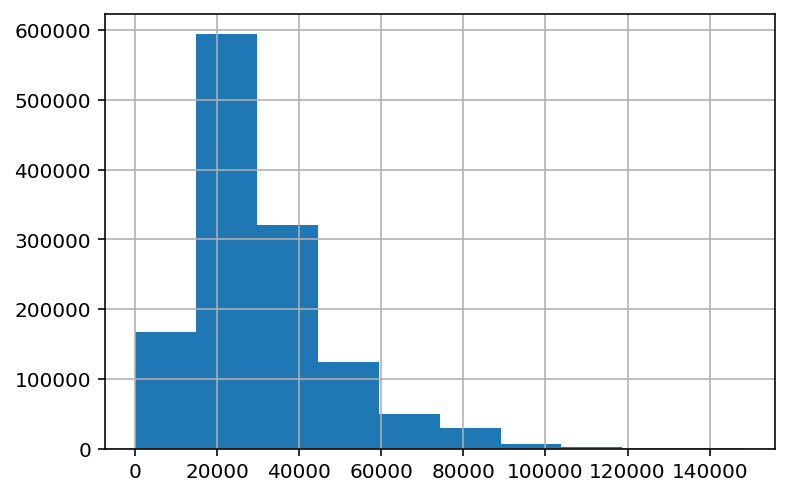

In [18]:
df.income.hist();

# Old

In [9]:
df.income.describe()

count    123461.000000
mean      25961.065555
std       13902.765514
min        1080.000000
25%       18135.621094
50%       23626.849609
75%       30828.178711
max       90528.451172
Name: income, dtype: float64

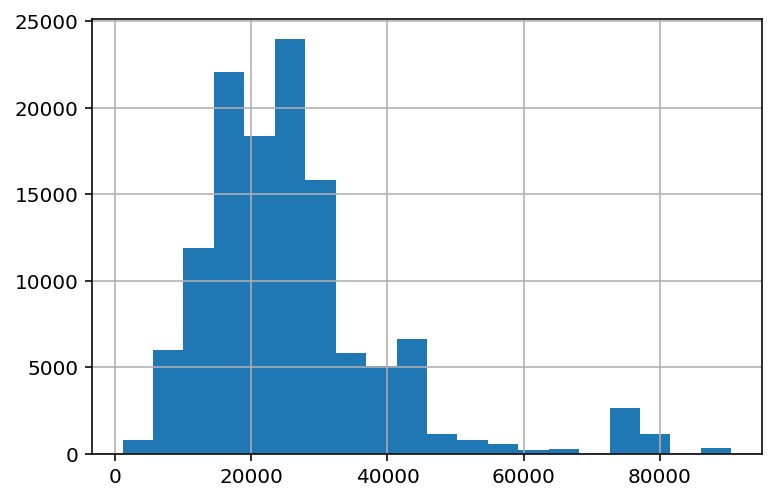

In [19]:
df.income.hist(bins=20);